In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,auc
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from numpy import trapz
import numpy as np

In [2]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
X=df.drop(columns="Species")
y=df["Species"]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.98,random_state=42)

In [7]:
lr=LogisticRegression(multi_class='ovr')

In [8]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [9]:
y_proba =lr.predict_proba(X_test)
y_proba

array([[1.33970986e-01, 8.66020384e-01, 8.62997997e-06],
       [9.55866427e-01, 4.41335730e-02, 1.98137298e-19],
       [1.79724916e-05, 2.84993544e-01, 7.14988483e-01],
       [5.08843761e-02, 9.49010283e-01, 1.05340885e-04],
       [1.02598193e-01, 8.97344634e-01, 5.71728461e-05],
       [8.82879372e-01, 1.17120628e-01, 1.98895422e-16],
       [3.46123830e-01, 6.53876131e-01, 3.92671774e-08],
       [3.29524163e-07, 4.74598197e-01, 5.25401473e-01],
       [2.83485197e-01, 7.16514235e-01, 5.68286759e-07],
       [1.74201763e-02, 9.82046030e-01, 5.33793468e-04],
       [5.72289144e-05, 3.81514803e-01, 6.18427968e-01],
       [9.38989192e-01, 6.10108080e-02, 6.77302446e-21],
       [8.36827763e-01, 1.63172237e-01, 2.83808900e-15],
       [9.53624199e-01, 4.63758006e-02, 1.39061157e-21],
       [9.35399911e-01, 6.46000886e-02, 3.12502364e-19],
       [8.40229411e-01, 1.59770589e-01, 5.74392132e-10],
       [1.71313123e-04, 3.04984868e-01, 6.94843819e-01],
       [1.70774228e-01, 8.29225

In [10]:
def calculate_tpr_fpr(y_actual, y_hat,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)): 
        if(y_hat[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
                
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return tpr,fpr

In [11]:
classes = lr.classes_
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

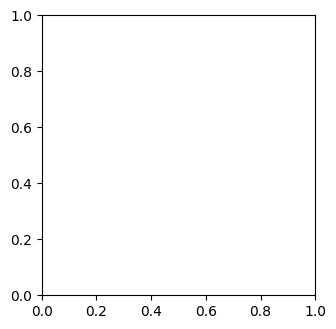

In [17]:
plt.figure(figsize = (12, 8))
roc_auc_ovr = {}
for i in range(len(classes)):
    # Get class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    

    
    ax = plt.subplot(2, 3, i+4)
    tpr, fpr = calculate_tpr_fpr(df_aux['class'], df_aux['prob'])    
#     print(tpr)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.03, 1)
    plt.ylim(0, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve {c}")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

Iris-setosa
Iris-versicolor
Iris-virginica


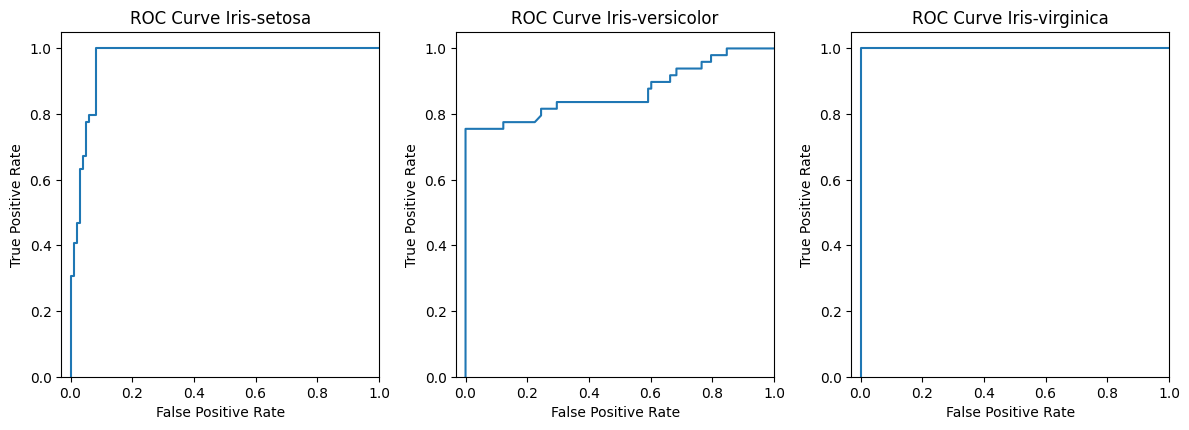

In [18]:
plt.figure(figsize = (12, 8))
roc_auc_ovr = {}
for i in range(3):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    thresholds = np.linspace(0,1,1000)
    fpr_list = []
    tpr_list = []
    roc_points = []
    for threshold in thresholds:
        tpr,fpr = calculate_tpr_fpr(df_aux['class'], df_aux['prob'], threshold)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    print(c)
    
    ax = plt.subplot(2, 3, i+4)
#     tpr, fpr = roc_values(df_aux['class'], df_aux['prob'])    
#     print(tpr)
    plt.plot(fpr_list, tpr_list)
#     sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.03, 1)
    plt.ylim(0, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve {c}")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [14]:
roc_auc_ovr

{'Iris-setosa': 0.967930029154519,
 'Iris-versicolor': 0.8688046647230321,
 'Iris-virginica': 1.0}

In [15]:
sum_auc=0
for c in classes:
    auc=roc_auc_ovr[c]
    sum_auc=auc+sum_auc

In [16]:
avg_auc=sum_auc/len(classes)
avg_auc

0.945578231292517